# <div style= "font-family: serif; font-weight:bold; letter-spacing: 0px; color:black; font-size:100%; text-align:left;padding:3.0px; background: #f68504; border-bottom: 8px solid #211201" > IMPORTS<br> <div> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from IPython.display import Image
%matplotlib inline

In [2]:
file = pd.read_csv('/kaggle/input/aggregated-total-contracts-10k-and-under/Contracts_U_B_10000.csv')

In [3]:
file.head()

,_id,year,contract_goods_number_of,contracts_goods_original_value,contracts_goods_amendment_value,contract_service_number_of,contracts_service_original_value,contracts_service_amendment_value,contract_construction_number_of,contracts_construction_original_value,contracts_construction_amendment_value,acquisition_card_transactions_number_of,acquisition_card_transactions_total_value,owner_org,owner_org_title
0,311,2018,94,184025.19,3368.29,143,406736.12,-9963.38,0,0.0,0.0,2130,599303.28,pbc-clcc,Parole Board of Canada | Commission des libéra...
1,20,2017,666,1501146.00,33321.00,738,1290082.00,99492.00,4,5225.0,0.0,45301,16263536.09,cbsa-asfc,Canada Border Services Agency | Agence des ser...
2,259,2021,60,176632.81,4054.06,115,638291.11,98383.40,0,0.0,0.0,916,611167.39,oag-bvg,Office of the Auditor General of Canada | Bure...
3,339,2017,31,138343.53,692.02,572,1171348.68,9777.34,0,0.0,0.0,937,390306.94,psc-cfp,Public Service Commission of Canada | Commissi...
4,31,2019,20,76759.29,224.78,57,144727.53,9760.02,0,0.0,0.0,1700,1085352.32,cer-rec,Canada Energy Regulator | La Régie de l’énergi...


In [4]:
file.shape

(395, 15)

***The dataset contains of 15 columns and 395 rows.***

In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   _id                                        395 non-null    int64  
 1   year                                       395 non-null    int64  
 2   contract_goods_number_of                   395 non-null    int64  
 3   contracts_goods_original_value             395 non-null    float64
 4   contracts_goods_amendment_value            395 non-null    float64
 5   contract_service_number_of                 395 non-null    int64  
 6   contracts_service_original_value           395 non-null    float64
 7   contracts_service_amendment_value          395 non-null    float64
 8   contract_construction_number_of            395 non-null    int64  
 9   contracts_construction_original_value      395 non-null    float64
 10  contracts_construction_ame

# <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:#211201; font-size:100%; text-align:left;padding:3.0px; background: #f68504; border-bottom: 8px solid #211201" > CONFIGURATION PARAMETERS<br><div> 


| Column         | Description                                             | Type|
| ---               | ---                                                     | :-:                   |
|id|A unique identifier for each record in the dataset|(Numeric-Discrete)  |
|year| The year in which the contract or transaction occurred|(Numeric-Discrete)|  
|contract goods number of | number of goods-related contracts or how many contracts are associated test | (Numeric-Discrete)|     
|contracts goods original value|Estimated or agreed-upon value of the contracts when they were first established| (Numeric-Continues)                |
|contracts goods amendment value  |  Any changes or amendments made to the original value of goods-related contracts   |(Numeric-Continues)
|contract service number of|how many contracts are associated with the provision of services|(Numeric-Discrete)
|contracts service original value  | This column could represent the original value of service-related contracts |(Numeric-Continues)
|contracts service amendment value| any changes or amendments made to the original value of service-related contracts|(Numeric-Continues)
|contract construction number of  |How many contracts are associated with construction projects |(Numeric-Discrete)
|contracts construction original value |Represent the original value of construction related contracts |(Numeric-Continues)
|contracts construction amendment value |any changes or amendments made to the original value of construction-related contracts |(Numeric-Continues)
|acquisition card transactions number of | The number of transactions made using acquisition cards. |(Numeric-Discrete)
|acquisition card transactions total value |This column might represent the total value of all transactions made using acquisition cards |(Numeric-Continues)
|owner org |Represent the organization or entity that owns or is responsible for the contract or transaction |(String-Nominal)
|owner org title |This column likely provides a title or description of the owning organization |(String-Nominal)

# <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:#211201; font-size:100%; text-align:left;padding:3.0px; background: #f68504; border-bottom: 8px solid #211201" >Preprocessing <br><div> 

In [6]:
file.isnull().sum()

_id                                          0
year                                         0
contract_goods_number_of                     0
contracts_goods_original_value               0
contracts_goods_amendment_value              0
contract_service_number_of                   0
contracts_service_original_value             0
contracts_service_amendment_value            0
contract_construction_number_of              0
contracts_construction_original_value        0
contracts_construction_amendment_value       0
acquisition_card_transactions_number_of      0
acquisition_card_transactions_total_value    0
owner_org                                    0
owner_org_title                              0
dtype: int64

***No Null values***

In [7]:
file.duplicated().sum()

0

***No duplicate values***

In [8]:
file.describe()

,_id,year,contract_goods_number_of,contracts_goods_original_value,contracts_goods_amendment_value,contract_service_number_of,contracts_service_original_value,contracts_service_amendment_value,contract_construction_number_of,contracts_construction_original_value,contracts_construction_amendment_value,acquisition_card_transactions_number_of,acquisition_card_transactions_total_value
count,395.000000,395.000000,395.000000,3.950000e+02,3.950000e+02,395.000000,3.950000e+02,3.950000e+02,395.000000,3.950000e+02,3.950000e+02,395.000000,3.950000e+02
mean,198.000000,2019.362025,2875.496203,4.653947e+06,9.546570e+03,1929.569620,4.493705e+06,2.285826e+05,187.015190,1.313457e+06,3.643093e+04,27290.356962,1.206436e+07
std,114.170924,1.766317,12558.193729,1.572464e+07,7.950276e+05,6842.754312,1.429585e+07,1.369675e+06,757.253131,1.573439e+07,1.718858e+05,72495.102946,3.071840e+07
min,1.000000,2016.000000,0.000000,0.000000e+00,-1.377273e+07,2.000000,6.298070e+03,-1.224318e+06,0.000000,0.000000e+00,-1.234900e+05,0.000000,0.000000e+00
25%,99.500000,2018.000000,29.000000,9.364553e+04,0.000000e+00,63.000000,2.035632e+05,1.749245e+03,0.000000,0.000000e+00,0.000000e+00,863.500000,3.226290e+05
50%,198.000000,2019.000000,73.000000,2.175245e+05,2.881500e+03,161.000000,5.625070e+05,2.338833e+04,0.000000,0.000000e+00,0.000000e+00,2931.000000,1.059781e+06
75%,296.500000,2021.000000,625.000000,1.505423e+06,1.688704e+04,803.000000,2.083080e+06,1.134695e+05,8.000000,2.697634e+04,0.000000e+00,18585.000000,1.030458e+07
max,395.000000,2023.000000,99975.000000,1.115268e+08,7.471781e+06,63462.000000,2.145589e+08,1.878145e+07,5729.000000,3.108233e+08,1.975947e+06,473123.000000,2.235483e+08


# <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:#211201; font-size:100%; text-align:left;padding:3.0px; background: #f68504; border-bottom: 8px solid #211201" >Visual Exploratory Data Analysis <br><div>

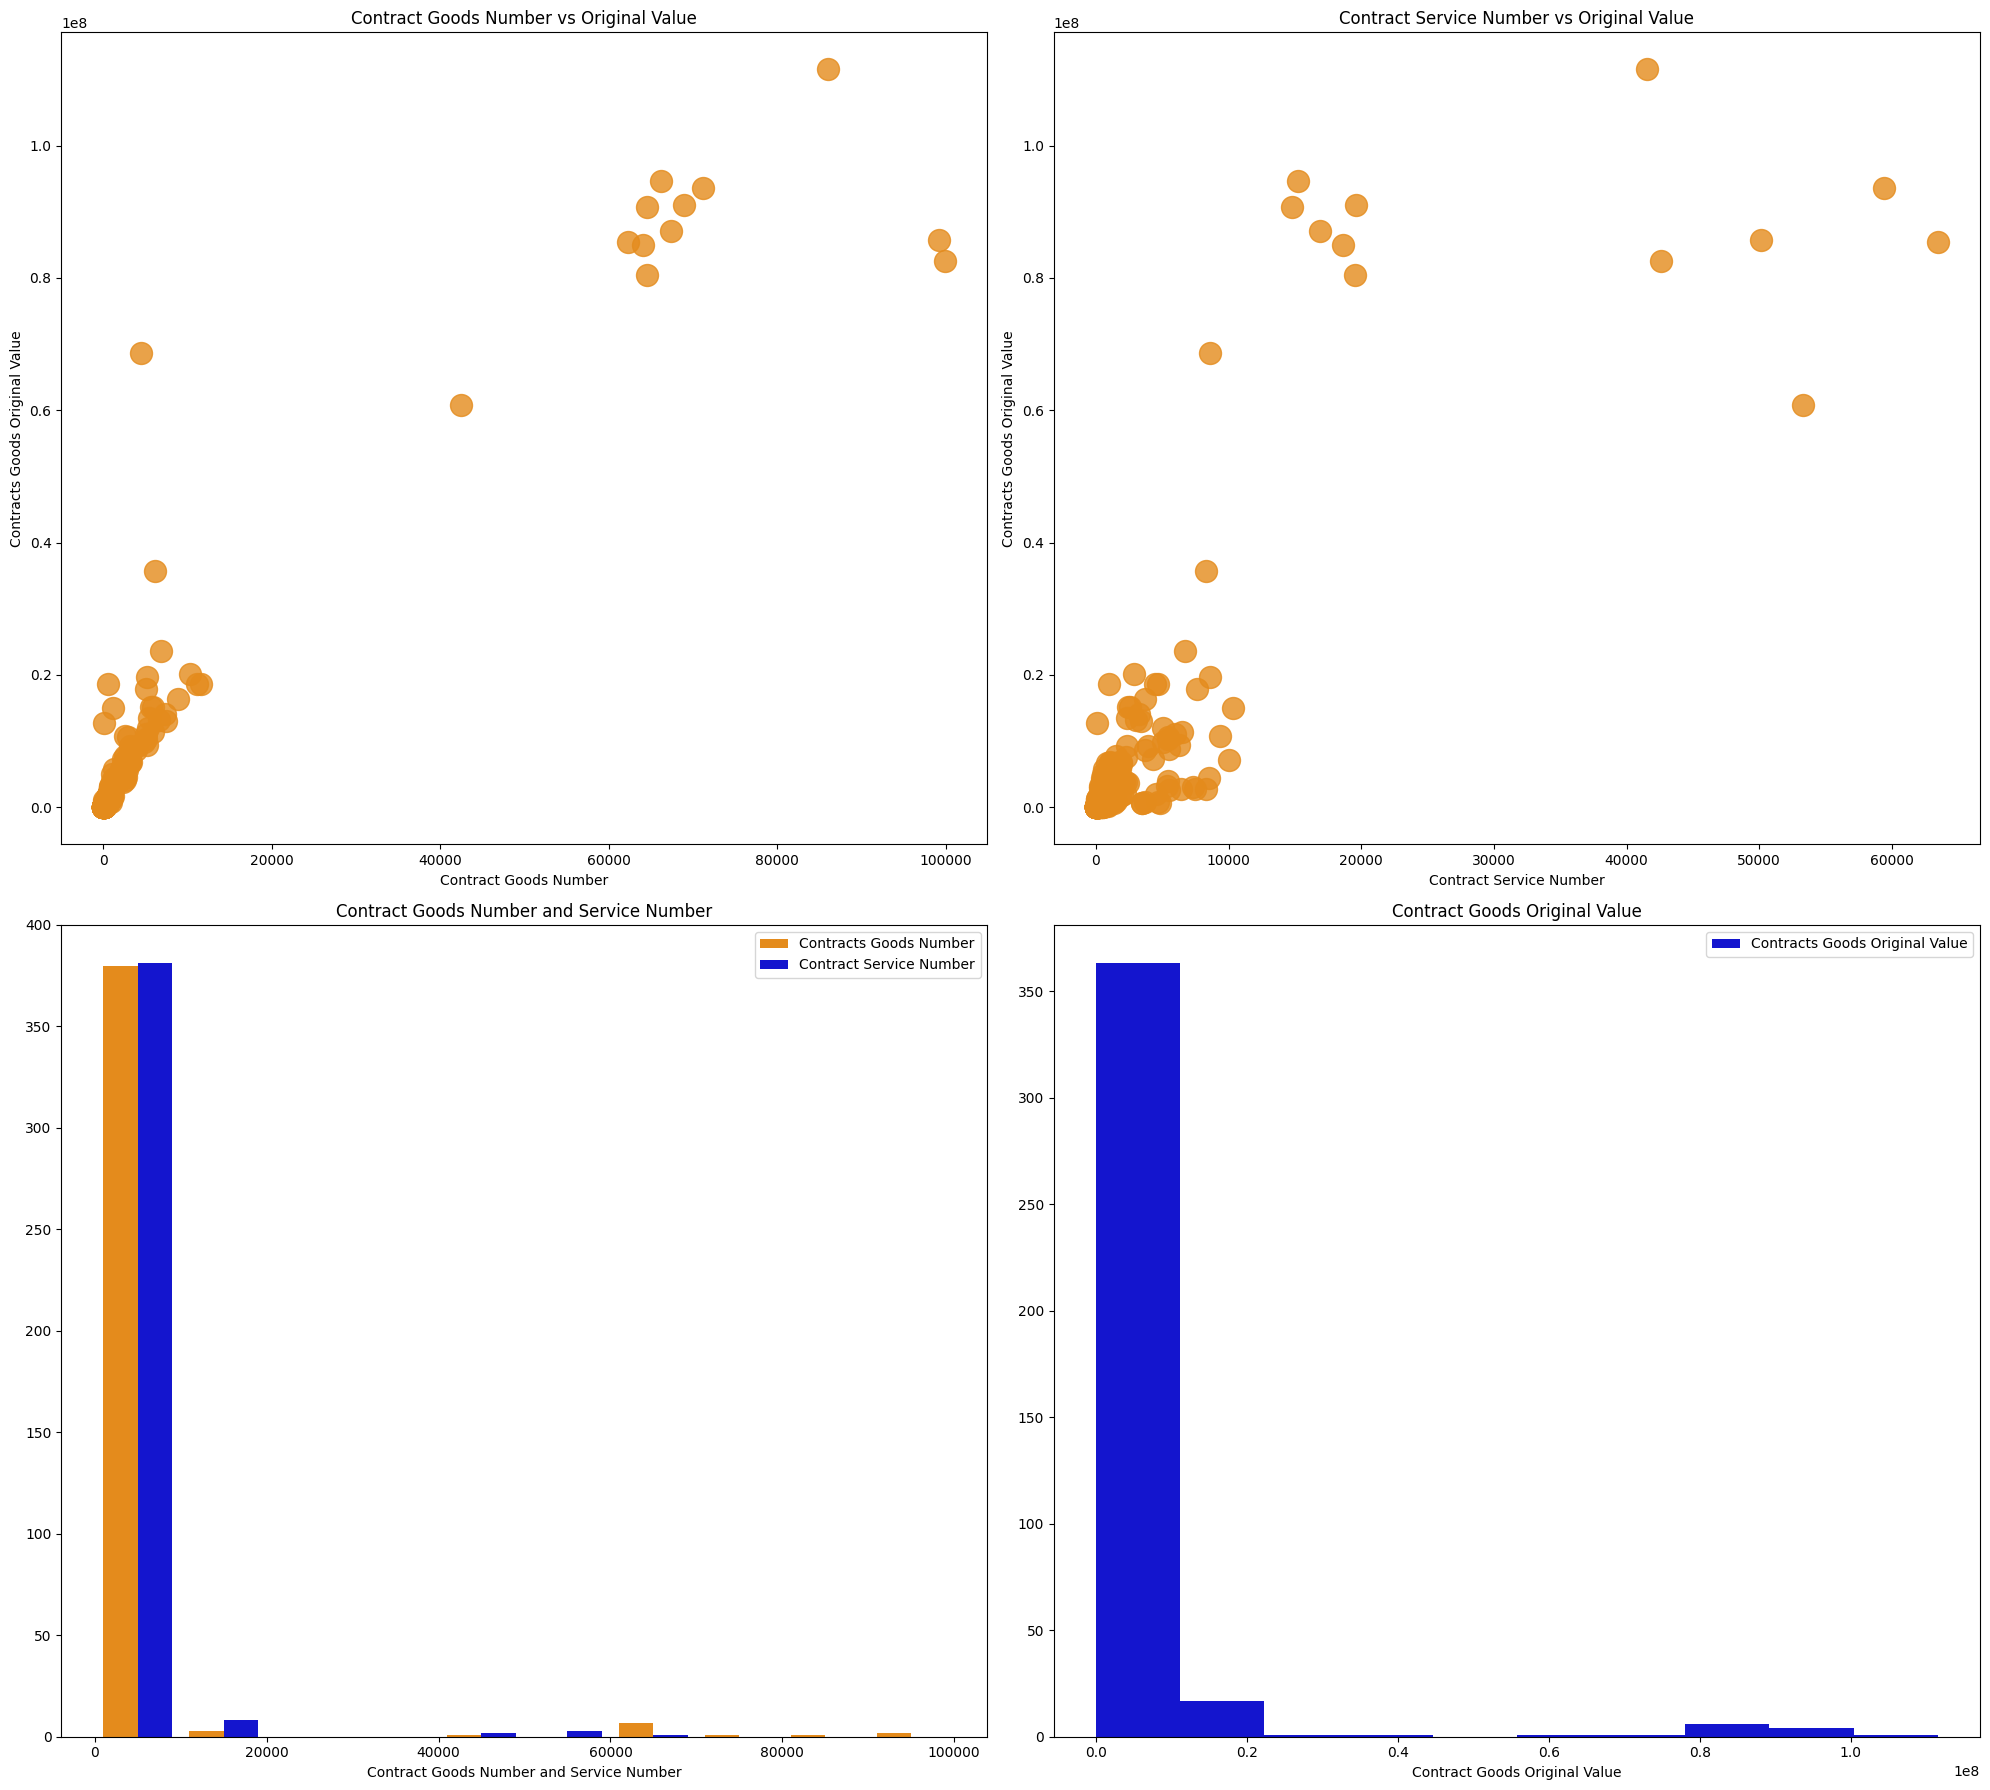

In [9]:
colors = ['#e48b1c', '#1415ce']
def scatter_plot(ax, x, y, title, xlabel, ylabel, color, alpha=0.8, s=250):
    ax.scatter(x=x, y=y, color=color, alpha=alpha, s=s)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

def histogram_plot(ax, data, title, xlabel, legend_labels, colors):
    ax.hist(x=data, color=colors)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.legend(legend_labels)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 18))

scatter_plot(axes[0, 0], file['contract_goods_number_of'], file['contracts_goods_original_value'],
             "Contract Goods Number vs Original Value", "Contract Goods Number", "Contracts Goods Original Value", colors[0])

scatter_plot(axes[0, 1], file['contract_service_number_of'], file['contracts_goods_original_value'],
             "Contract Service Number vs Original Value", "Contract Service Number", "Contracts Goods Original Value", colors[0])

histogram_plot(axes[1, 0], [file['contract_goods_number_of'], file['contract_service_number_of']],
               "Contract Goods Number and Service Number", "Contract Goods Number and Service Number",
               ['Contracts Goods Number', 'Contract Service Number'], colors)

histogram_plot(axes[1, 1], file['contracts_goods_original_value'],
               "Contract Goods Original Value", "Contract Goods Original Value", ['Contracts Goods Original Value'], colors[1])

plt.tight_layout()
plt.show()

***The density of Contract Goods Number is between [0,1000]. Additionally, there is a strong correlation among Contract Goods Number and Contract Goods Original Value.***

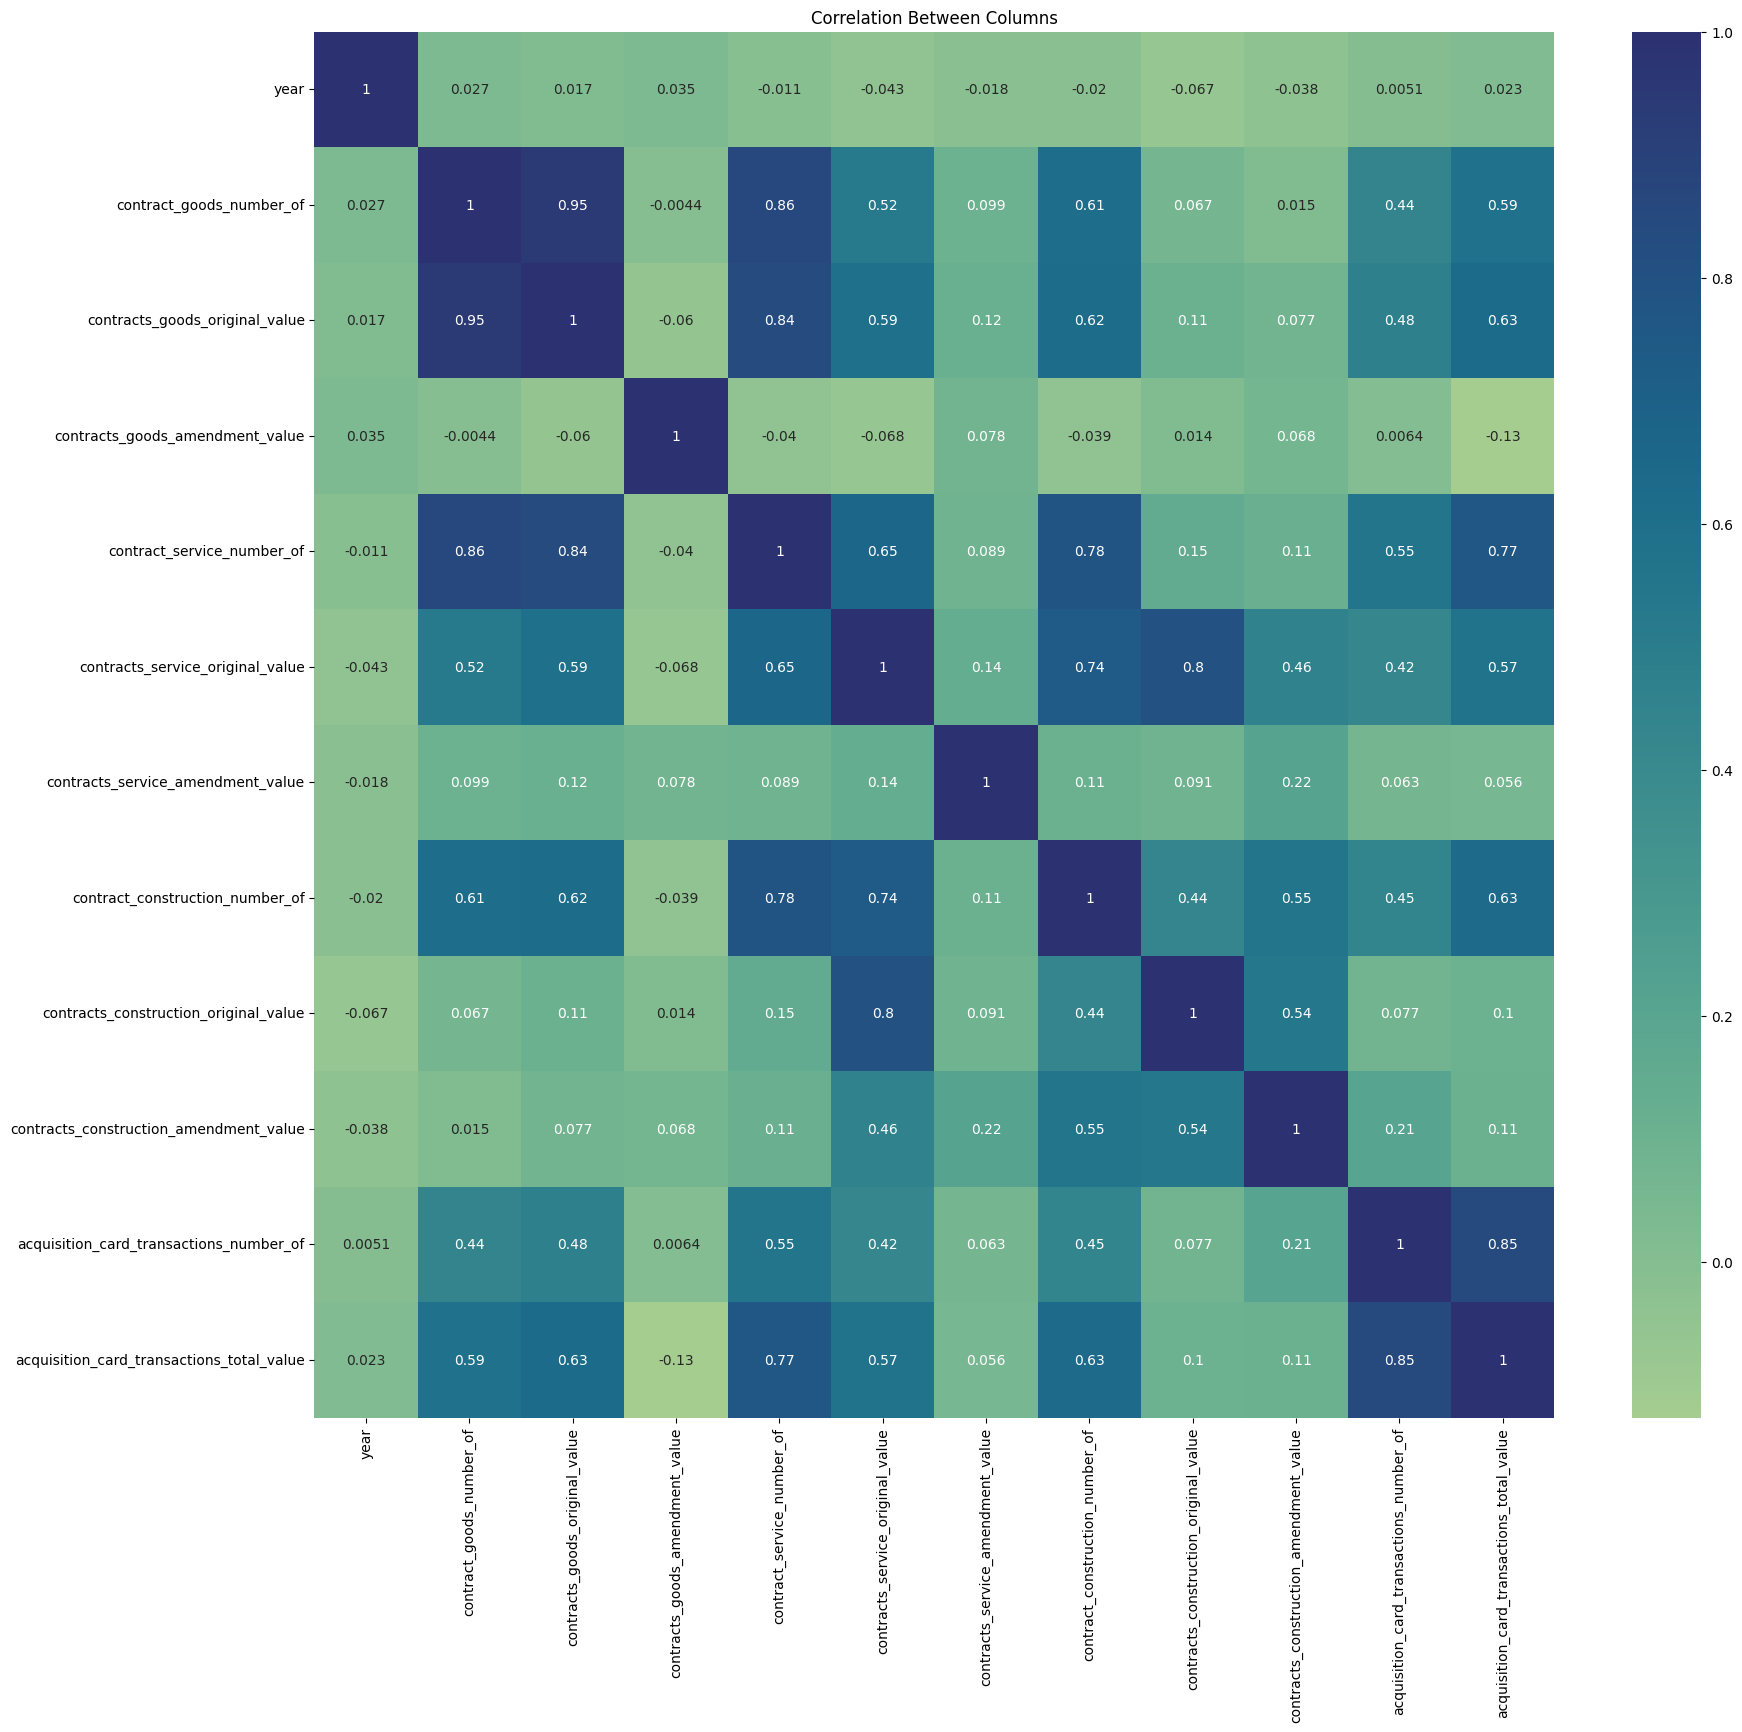

In [10]:
def plot_correlation_heatmap(data_frame, columns_to_drop=None, figsize=(20, 18), cmap="crest"):
    # Drop specified columns
    if columns_to_drop:
        cleaned_data = data_frame.drop(columns=columns_to_drop, axis=1)
    else:
        cleaned_data = data_frame.copy()

    # Set up the plot
    plt.figure(figsize=figsize)

    # Generate a heatmap of the correlation matrix
    correlation_matrix = cleaned_data.corr()
    sns.heatmap(correlation_matrix, cmap=cmap, annot=True)

    # Set plot title
    plt.title("Correlation Between Columns")

    # Show the plot
    plt.show()
plot_correlation_heatmap(file, columns_to_drop=['owner_org', 'owner_org_title', '_id'], figsize=(20, 18), cmap="crest")

***The closer the correlation coefficient is to -1 or 1, the stronger the correlation. A coefficient close to 0 indicates a weaker correlation.***

***A positive correlation indicates that as one variable increases, the other variable tends to increase as well.***

There a strong correlation between contract_goods_number_of and contracts_goods_original_value.

# <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:#211201; font-size:100%; text-align:left;padding:3.0px; background: #f68504; border-bottom: 8px solid #211201" >Train and Test Model <br><div>

In [11]:
x = file[['contract_goods_number_of']]
y = file['contracts_goods_original_value']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=101)

In [12]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [13]:
predictions = model.predict(x_test)

In [14]:
predictions[:5]

array([1104749.38822235, 1995355.85266526, 1156262.61560015,
       1102459.91145   , 1105894.12660852])

In [15]:
y_test[:5]

38       12573.89
186    1851405.31
374     154452.00
139       8826.66
206      24185.33
Name: contracts_goods_original_value, dtype: float64

In [16]:
print(f'Training Score: {model.score(x_train, y_train)}')
print(f'Testing Score: {model.score(x_test, y_test)}')

Training Score: 0.9273872978784944
Testing Score: 0.8269788701094181


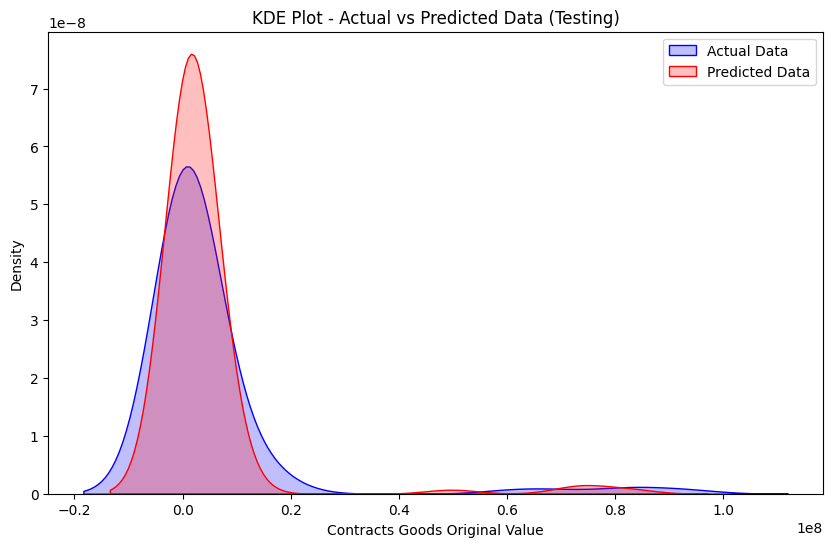

In [17]:
def kde_model(y_test, predict, tr_or_ts):
    plt.figure(figsize=(10, 6))

    # KDE for actual data
    sns.kdeplot(y_test, label='Actual Data', color='blue', fill=True)

    # KDE for predicted data
    sns.kdeplot(predict, label='Predicted Data', color='red', fill=True)

    plt.title(f'KDE Plot - Actual vs Predicted Data ({tr_or_ts})')
    plt.xlabel('Contracts Goods Original Value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
kde_model(y_test, predictions, 'Testing')

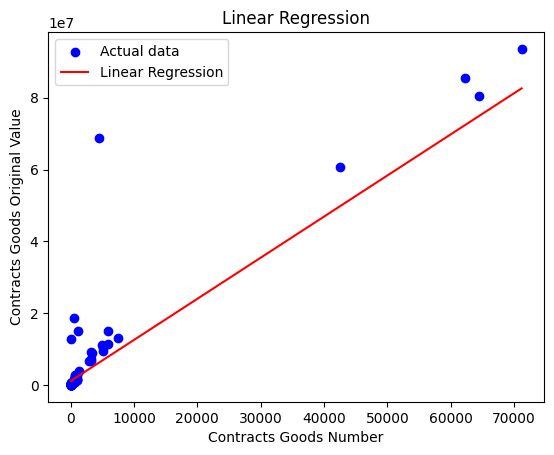

In [18]:
def scatter_model(x_test, y_test, predict_pr, title):
    plt.scatter(x_test, y_test, color='blue', label='Actual data')
    plt.plot(np.sort(x_test, axis=0), np.sort(predict_pr, axis=0), color='red', label=title)
    plt.title(title)
    plt.xlabel('Contracts Goods Number')
    plt.ylabel('Contracts Goods Original Value')
    plt.legend()
    plt.show()
scatter_model(x_test, y_test, predictions, 'Linear Regression')

**Overfitting** and **underfitting** are two common issues in machine learning models, and they relate to the model's ability to generalize from the training data to new, unseen data.

1. **Overfitting** occurs when a model learns the training data too well, capturing noise and random fluctuations in the data rather than the underlying patterns.


*   High accuracy on the training data
*   Captures noise and outliers

2. **Underfitting** happens when a model is too simple to capture the underlying patterns in the training data. The model fails to learn the relationships and, as a result, performs poorly on both the training set and new data


*   Low accuracy on both the training data and new data
*   Oversimplified model that fails to capture complexities.

![](https://www.educative.io/api/edpresso/shot/6668977167138816/image/5033807687188480)

Let's find a solution to overcome the underfitting issue. 

# <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:#211201; font-size:100%; text-align:left;padding:3.0px; background: #f68504; border-bottom: 8px solid #211201" >Improvment <br><div>

Text(0.5, 1.0, 'R^2 Using Test Data')

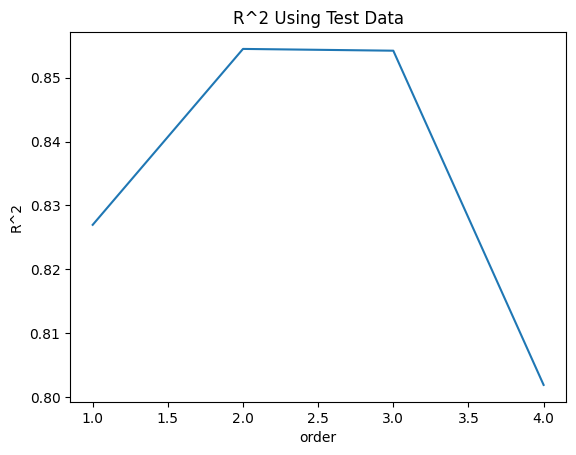

In [19]:
lm = LinearRegression()
re_test = []
order = [1,2,3,4]
for n in order:
  pr = PolynomialFeatures(degree = n)
  x_train_pr = pr.fit_transform(x_train)
  x_test_pr = pr.fit_transform(x_test)
  lm.fit(x_train_pr, y_train)
  re_test.append(lm.score(x_test_pr, y_test))

plt.plot(order, re_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title("R^2 Using Test Data")

The polynomial model with the degree of 2 has the highest accuracy score.

In [20]:
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
lm.fit(x_train_pr, y_train)

LinearRegression()

In [21]:
predict_tr_pr = lm.predict(x_train_pr)

In [22]:
predict_pr = lm.predict(x_test_pr)

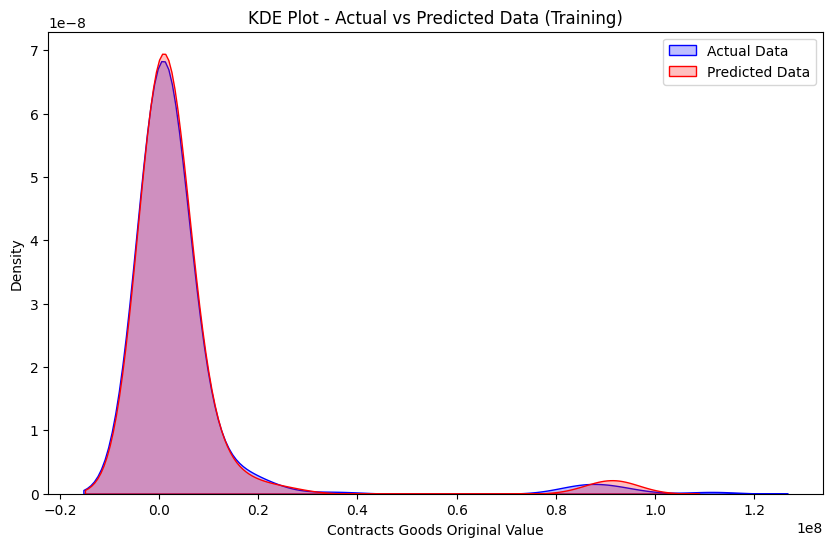

In [23]:
kde_model(y_train, predict_tr_pr, 'Training')

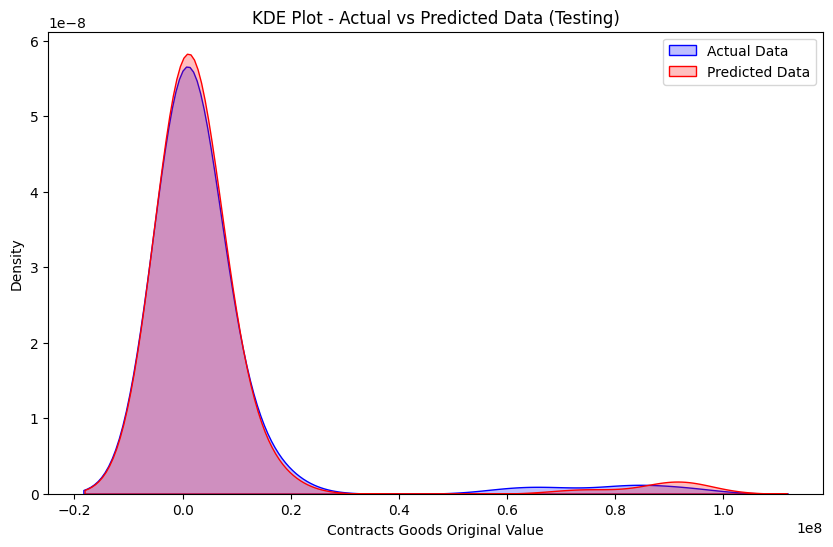

In [24]:
kde_model(y_test, predict_pr, 'Testing')

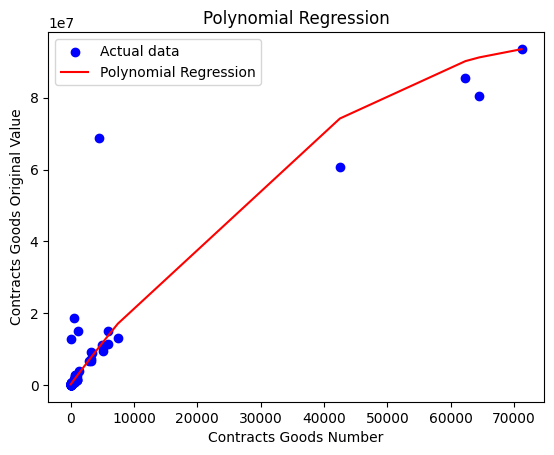

In [25]:
scatter_model(x_test, y_test, predict_pr, 'Polynomial Regression')

***The model (Ploynomial Regression with degree 2) seems to be doing well in testing and training from the dataset!***

## <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:#211201; font-size:100%; text-align:left;padding:3.0px; background: #f68504; border-bottom: 8px solid #211201" >If you like my notebook, please don't forget to upvote! <br><div>
# <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:#211201; font-size:100%; text-align:left;padding:3.0px; background: #f68504; border-bottom: 8px solid #211201" >Thank You :) <br><div>